<a href="https://colab.research.google.com/github/dnesemgithb/CS4410/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from textblob import TextBlob

In [5]:
text = 'Today is beautiul. Tomorrow looks bad'

In [6]:
blob = TextBlob(text)

In [7]:
blob

TextBlob("Today is beautiul. Tomorrow looks bad")

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
blob.sentences

[Sentence("Today is beautiul."), Sentence("Tomorrow looks bad")]

In [16]:
blob.words

WordList(['Today', 'is', 'beautiul', 'Tomorrow', 'looks', 'bad'])

In [18]:
nltk.download('averaged_perceptron_tagger_eng')
blob.tags

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('Today', 'NN'),
 ('is', 'VBZ'),
 ('beautiul', 'VBN'),
 ('Tomorrow', 'NNP'),
 ('looks', 'VBZ'),
 ('bad', 'JJ')]

In [19]:
blob

TextBlob("Today is beautiul. Tomorrow looks bad")

In [21]:
nltk.download('brown')
blob.noun_phrases


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


WordList(['tomorrow'])

In [22]:
blob.sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [28]:
blob.sentences

[Sentence("Today is beautiul."), Sentence("Tomorrow looks bad")]

In [29]:
for sentence in blob.sentences:
  print(sentence.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


In [30]:
!pip install requests textblob wordcloud imageio matplotlib nltk

In [31]:
# Step 3: Imports
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
import imageio.v3 as iio
import numpy as np
from nltk.corpus import stopwords
from collections import Counter

In [32]:
# Step 4: Download Hamlet text from Gutenberg
url = 'https://www.gutenberg.org/files/2265/2265-0.txt'
response = requests.get(url)
hamlet_text = response.text

In [33]:
blob=TextBlob(hamlet_text)

In [34]:
words = blob.words

In [37]:
stop_words = set(stopwords.words('english'))
clean_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

In [38]:
word_counts = Counter(clean_words)

In [39]:
top_20 = word_counts.most_common(20)

In [40]:
labels,counts = zip(*top_20)

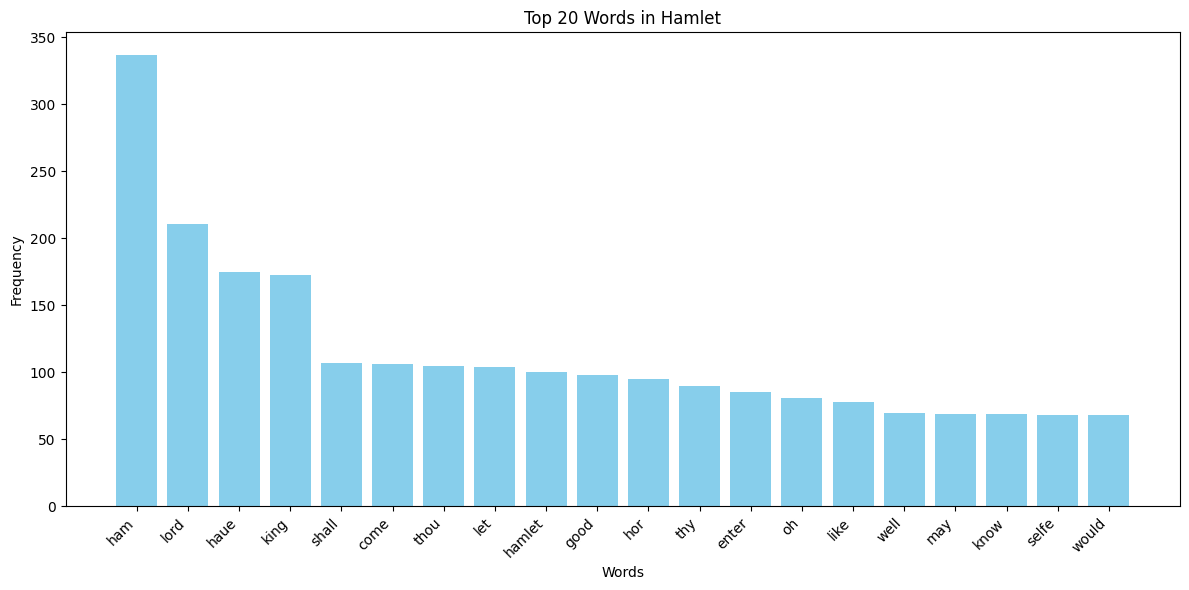

In [44]:
# Step 9: Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color='skyblue')
plt.title("Top 20 Words in Hamlet")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [42]:
# Step 10: Load the oval mask image from the Chegg link in your assignment
mask_url = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = iio.imread(mask_url)

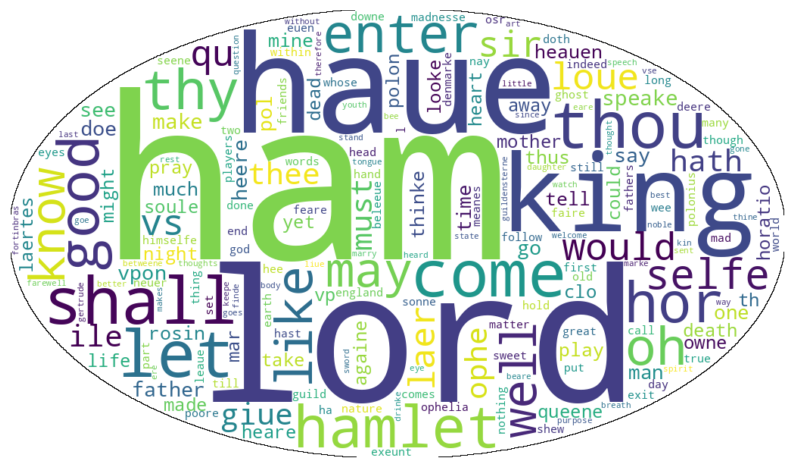

In [54]:
# Step 11: Create and display word cloud using the mask
wordcloud = WordCloud(
    width=600,
    height=300,
    background_color="white",
    mask=mask_image,
    contour_width=1,
    contour_color='black').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()